In [7]:
import tensorflow as tf
import struct                                                                   
import numpy as np                                                              
import matplotlib.pyplot as plt                                                 
from PIL import Image
#https://medium.com/%E8%BB%9F%E9%AB%94%E4%B9%8B%E5%BF%83/%E9%81%A9%E5%90%88%E5%A4%A7%E9%87%8F%E8%B3%87%E6%96%99i-o%E7%9A%84%E5%84%B2%E5%AD%98%E6%A0%BC%E5%BC%8F-tfrecord%E7%B0%A1%E4%BB%8B%E8%88%87%E6%93%8D%E4%BD%9C%E6%95%99%E5%AD%B8-cd27e50d51ee

# mnist one example consists of 28*28 byte + 1 byte
# if _bytes_feature's args is alreaddy a list, no need to use []
def _image_feature(value):
    """Returns a uint8(byte)_list from a byte."""
    if isinstance(value, type(tf.constant(0))):
        # BytesList won't unpack a string from an EagerTensor.
        value = value.numpy()
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _label_feature(value):
    """Returns a uint8(byte)_list from a byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

0 b'\x05'


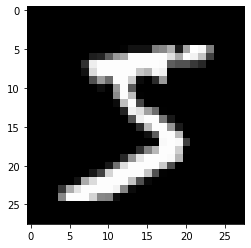

b'\x00'


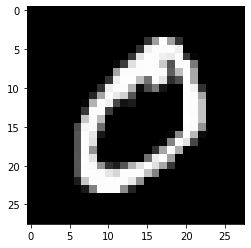

1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 

In [63]:
""" transfer dataset to tfrecord method"""
# the whole image is a byte feature, not a byte list
import struct
import struct                                                                   
import numpy as np                                                              
import matplotlib.pyplot as plt                                                 
from PIL import Image
def serialize_example(_label, _image):
    feature = {
        "label": _label_feature(_label),
        "image": _image_feature(_image),
        }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString() 

images_file_name = './train-images.idx3-ubyte'
labels_file_name = './train-labels.idx1-ubyte'
mnist_images=open(images_file_name,'rb')
mnist_labels=open(labels_file_name,'rb')
# skip header file
_=mnist_images.read(16)
_=mnist_labels.read(8)

# data
with tf.io.TFRecordWriter("mnist_nonsparse.tfrecords") as writer:
    for i in range (60000):
        buf=mnist_labels.read(1)
        _label=buf
        buf=mnist_images.read(784)
        _image=buf
        np_image=np.frombuffer(_image, dtype='>B').astype(np.uint8)
        if(i%1000==0):
            print(i,end=' ')
        
        if(i<2):
            print(_label)
            plt.imshow(np.asarray(np_image).reshape((28,28)),cmap = plt.cm.gray)                                        
            plt.show()
            
        serialized_example = serialize_example(_label, _image)
        writer.write(serialized_example)

In [4]:
""" standard way to iterate tfr, to make sure the tfr format is right """

dataset = tf.data.TFRecordDataset('mnist_nonsparse.tfrecords')

image_feature_description = {
    'label': tf.io.FixedLenFeature([], tf.string),
    'image': tf.io.FixedLenFeature([], tf.string),
}

def _parse_function(example_proto):
    serialized_example = tf.io.parse_single_example(example_proto, image_feature_description)
    return serialized_example


for idx, features in enumerate(dataset):
    parsed_features = _parse_function(features)
    #print("label=",parsed_features['label'].numpy())
    image=np.frombuffer(parsed_features['image'].numpy(),dtype='>B')
    #plt.imshow(np.asarray(image).reshape((28,28)),cmap = plt.cm.gray)                                        
    #plt.show()
    
    if idx>2:
        break

In [5]:
""" my way to read thr first instance in tfr, to make sure the tfr format is right """

import struct
#https://www.kite.com/python/answers/how-to-read-bytes-from-a-binary-file-in-python
#https://docs.python.org/3/library/struct.html

#uint64 length (little endian)
#uint32 masked_crc32_of_length
#byte   data[length]
#uint32 masked_crc32_of_data
binfile=open('mnist_nonsparse.tfrecords','rb')

# read data length
tmp=binfile.read(8)
length=struct.unpack("<Q",tmp)
print(length)

# skip crc
binfile.seek(4,1)

# read data 
tmp=binfile.read(length[0])
#data=struct.unpack("<Q",tmp)
parsed_features = _parse_function(tmp)
for key in parsed_features:
    print(f"{key}: {parsed_features[key].numpy()}")
    

# skip crc
binfile.seek(4,1)
binfile.close()

(822,)
image: b"\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x12\x12\x12~\x88\xaf\x1a\xa6\xff\xf7\x7f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x1e$^\x9a\xaa\xfd\xfd\xfd\xfd\xfd\xe1\xac\xfd\xf2\xc3@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x001\xee\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfd\xfb]RR8'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\xdb\xfd\xfd\xfd\xfd\xfd\xc6\xb6\xf7\xf1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

#https://www.kite.com/python/answers/how-to-read-bytes-from-a-binary-file-in-python
#uint64 length
#uint32 masked_crc32_of_length
#byte   data[length]
#uint32 masked_crc32_of_data
binfile=open('example.tfrecords','rb')
c=0
for l in binfile.readlines():
    c+=len(l)
    print(l)
print(c)
binfile.close()

In [8]:
""" the actual read() function """

def get_non_sparse_instance_length(binfile):
    tmp=binfile.read(8)
    length=struct.unpack("<Q",tmp)
    print(length)
    record_l=length[0]+16
    return record_l

def non_sparse_random_read(binfile, idx, record_l=-1):
    # calc one record length (B) if not specified
    if(record_l<0):
        # read data length
        print("calc one record length")
        tmp=binfile.read(8)
        length=struct.unpack("<Q",tmp)
        print(length)
        # include the 0,2,3 column
        record_l=length[0]+16
    
    # random read
    binfile.seek(idx*record_l,0)
    tmp=binfile.read(record_l)
    r_data=tmp[12:-4]

    # deserialize data
    parsed_features = _parse_function(r_data)
    #for key in parsed_features:
    #    print(f"{key}: {parsed_features[key].numpy()}")
    
    return parsed_features
    
    

(822,)
tf.Tensor(b'\x03', shape=(), dtype=string)


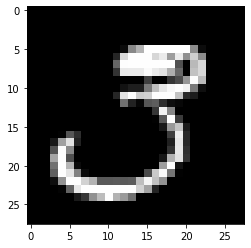

In [10]:
""" test read() function """

import struct
binfile=open('mnist_nonsparse.tfrecords','rb')
l=get_non_sparse_instance_length(binfile)
parsed_feature=non_sparse_random_read(binfile, 59955, record_l=l)
image=parsed_feature['image'].numpy()
print(parsed_feature['label'])
np_image=np.frombuffer(image, dtype='>B').astype(np.uint8)
plt.imshow(np.asarray(np_image).reshape((28,28)),cmap = plt.cm.gray)                                        
plt.show()
